In [1]:
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist

In [10]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 数据清洗
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [13]:
# 建立模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [14]:
# 训练模型
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 103s 110ms/step - loss: 0.1720 - accuracy: 0.9452
Epoch 2/5
938/938 [==============================] - 87s 92ms/step - loss: 0.0482 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 85s 90ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 86s 91ms/step - loss: 0.0255 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 84s 90ms/step - loss: 0.0204 - accuracy: 0.9936


In [15]:
# 验证
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0295 - accuracy: 0.9907
test_acc: 0.9907000064849854


In [18]:
# 保存模型
model.save('train.h5')

In [26]:
test_image = test_images[0]
test_image = test_image.reshape((1, 28, 28, 1))

In [27]:
print(test_image.shape)

(1, 28, 28, 1)


In [29]:
result = model.predict(test_image)

In [33]:
import numpy as np
np.argmax(result)

7

In [34]:
import matplotlib.pyplot as plt
def show_single_image(img_arr):
  plt.imshow(img_arr, cmap="binary")
  plt.show()

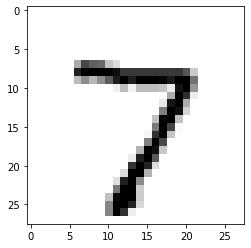

In [36]:
show_single_image(test_image[0])